<a href="https://colab.research.google.com/github/salv0304/Colab/blob/main/Copia_di_Relazione_Lenti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Relazione Lenti**

In [ ]:
import numpy as np
from scipy import optimize as sop
from scipy import constants as scc
import matplotlib.pyplot as plt  
from google.colab import files
import pandas as pd
from google.colab import files
from scipy.optimize import curve_fit 

##Propagazione della luce senza lenti

La prima parte dell'esperienza consiste nello studiare il comportamento dell'intensità rilevata da un fotodiodo, che utilizza come sorgente luminosa un LED, in funzione della distanza. 

Grafico i valori dell'intensità in uscita e della distanza tra LED e fotodiodo. Utilizzo i dati per un fit a due parametri della funzione $I=\frac{A}{(x+x_0)^2}$ dove $A$ è un coefficiente di proporzionalità e $x_0$ un fattore di correzione che introduciamo per correggere l'offset della misura della distanza.

###Scatter Plot dei dati

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """



 Distanza (m)		Intensità (V)
0.0 	 1.0
0.01 	 0.616
0.02 	 0.432
0.03 	 0.348
0.04 	 0.28
0.05 	 0.23
0.06 	 0.194
0.07 	 0.162
0.08 	 0.138
0.09 	 0.12
0.1 	 0.112


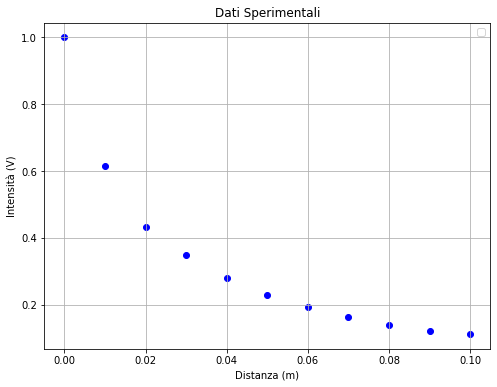

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("NoLenti.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
dist=dati[:,0] 
intens=dati[:,1] 

distanza = [i / 100 for i in dist] #conversione unità di msiura
intensità = [i / 1000 for i in intens] #conversione unità di msiura

print("\n Distanza (m)\t\tIntensità (V)")
for i in range(len(distanza)):
  print(distanza[i],"\t",intensità[i])


plt.scatter(distanza, intensità, color='blue')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Distanza (m)")
plt.ylabel("Intensità (V)")
plt.legend()

###Fit dei dati

In [ ]:
def funzione1(x,A,x0):
    intens= A/((x+x0)**(2))
    return intens

In [ ]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(A, x0, print_output=True, plot_guess=False):
 
  guess = np.array([A, x0]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 
 
  global popt, pcov    #declare fit results as global variables
 
  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(funzione1, distanza, intensità, p0=guess, bounds=bounds)

  if plot_guess:
    plt.plot(t, funzione1(t, guess[0], guess[1]),'--', color=[0.3,0.7,0], label="Guess", linewidth=20) # plot guess

                                                                                                
  #plotting fit result
  ndata=len(distanza)
  plt.figure(figsize=[10,6])
  xmin,xmax=distanza[0],distanza[ndata-1]
  x=np.arange(xmin,xmax+1e-5,0.01)
  y=funzione1(x,popt[0], popt[1])
  plt.ylabel('Intensità (V)', fontsize=20)
  plt.xlabel('Distanza (m)', fontsize=20)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.plot(distanza,intensità,'o',markersize=8,label="Exp.")
  plt.plot(x,y,label="Fit")
  plt.grid(True)
  plt.legend()
  plt.show()
  
  if print_output:
    label = ["A", "x0"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%11s = %10.10f +- %7.10f" % (l ,v, e))
    print("\n") 

<Figure size 648x432 with 0 Axes>

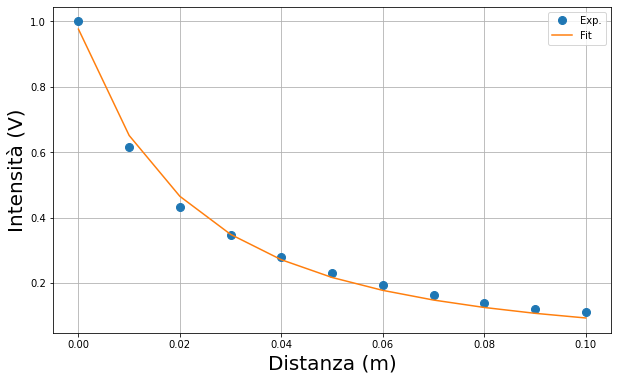

          A = 0.0019338211 +- 0.0001391242
         x0 = 0.0444995025 +- 0.0018591699




In [ ]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(10000,3.5)

##Propagazione della luce con una lente

Nella seconda parte dell'esperienza introduco una lente convergente e la fisso ad una distanza $x_i$ dal LED con $x_i > f$ e studio l'andamento dell'intensità in funzione della distanza.

in un secondo momento raccolgo le coppie di valori $(x_i,y_i)$, dove $x_i$ rappresenta la distanza fissata del LED dalla lente mentre $y_i$ la distanza tra lente e fotodiodo che massimizza l'intensità rilevata e utilizzo questi dati per verificare la legge $f= (\frac{1}{x+x_o} + \frac{1}{y+x_0})^{-1}$.

###Scatter plot dei dati


 Distanza (m)		Intensità (V)
0.0 	 0.332
0.015 	 0.444
0.03 	 0.624
0.045 	 1.11
0.06 	 0.992
0.075 	 0.688
0.09 	 0.448
0.105 	 0.316
0.12 	 0.23
0.0375 	 0.832


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


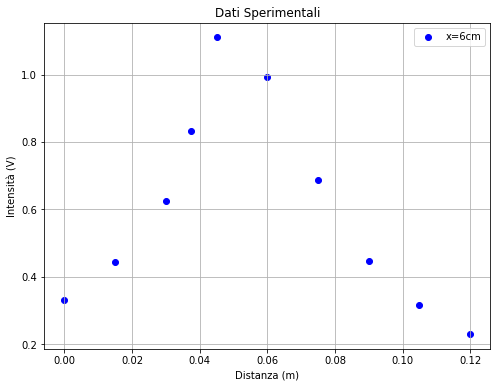

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("6cm.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
dist=dati[:,0] 
intens=dati[:,1] 

distanza = [i / 100 for i in dist] #conversione unità di msiura
intensità = [i / 1000 for i in intens] #conversione unità di msiura

print("\n Distanza (m)\t\tIntensità (V)")
for i in range(len(distanza)):
  print(distanza[i],"\t",intensità[i])


plt.scatter(distanza, intensità, color='blue', label='x=6cm')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Distanza (m)")
plt.ylabel("Intensità (V)")
plt.legend()


 Distanza (m)		Intensità (V)
0.0 	 0.248
0.015 	 0.48
0.03 	 0.976
0.045 	 0.656
0.06 	 0.384
0.075 	 0.234
0.0275 	 0.808
0.01 	 0.4
0.0375 	 0.88
0.02 	 0.656


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


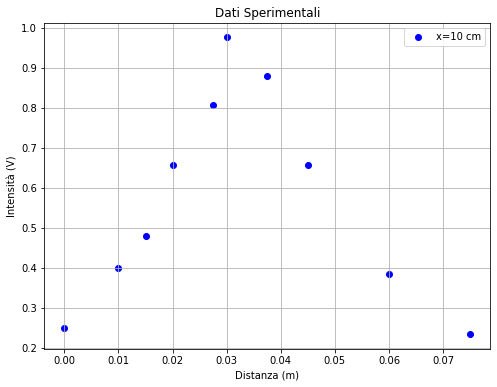

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("10cm.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
dist=dati[:,0] 
intens=dati[:,1] 

distanza = [i / 100 for i in dist] #conversione unità di msiura
intensità = [i / 1000 for i in intens] #conversione unità di msiura

print("\n Distanza (m)\t\tIntensità (V)")
for i in range(len(distanza)):
  print(distanza[i],"\t",intensità[i])


plt.scatter(distanza, intensità, color='blue', label='x=10 cm')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Distanza (m)")
plt.ylabel("Intensità (V)")
plt.legend()


 Distanza (m)		Intensità (V)
0.0 	 0.069
0.017 	 0.202
0.03 	 0.848
0.04 	 0.648
0.055 	 0.208
0.07 	 0.085
0.022000000000000002 	 0.576
0.035 	 0.84
0.037000000000000005 	 0.793
0.01 	 0.114
0.027000000000000003 	 0.816
0.02 	 0.34
0.045 	 0.452


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


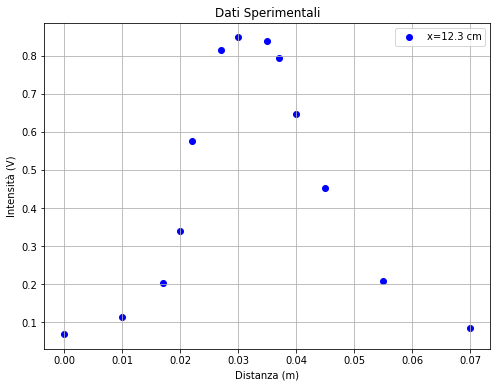

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("12.3cm.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
dist=dati[:,0] 
intens=dati[:,1] 

distanza = [i / 100 for i in dist] #conversione unità di msiura
intensità = [i / 1000 for i in intens] #conversione unità di msiura

print("\n Distanza (m)\t\tIntensità (V)")
for i in range(len(distanza)):
  print(distanza[i],"\t",intensità[i])


plt.scatter(distanza, intensità, color='blue',label='x=12.3 cm')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Distanza (m)")
plt.ylabel("Intensità (V)")
plt.legend()


 Distanza (m)		Intensità (V)
0.0 	 0.058
0.025 	 0.52
0.04 	 0.248
0.035 	 0.412
0.03 	 0.528
0.0275 	 0.524
0.02 	 0.408
0.015 	 0.178
0.01 	 0.087
0.0175 	 0.284
0.005 	 0.072
0.032 	 0.484


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


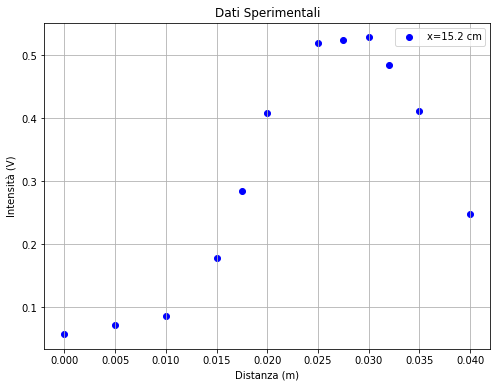

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("15.2cm.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
dist=dati[:,0] 
intens=dati[:,1] 

distanza = [i / 100 for i in dist] #conversione unità di msiura
intensità = [i / 1000 for i in intens] #conversione unità di msiura

print("\n Distanza (m)\t\tIntensità (V)")
for i in range(len(distanza)):
  print(distanza[i],"\t",intensità[i])


plt.scatter(distanza, intensità, color='blue', label='x=15.2 cm')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Distanza (m)")
plt.ylabel("Intensità (V)")
plt.legend()

Riporto le coppie $x_i$, $y_i$ e i corrispetivi $f$ calcolati utilizzando l'$x_0$ fittato nella prima parte dell'esperienza.

\begin{array}{ccc}
x_i(cm) & y_i (cm) & f(cm)\\
\hline
6 & 4.5 & 4.796 \\
10 & 3 & 4.888 \\
12.3 & 3  & 5.128 \\
15.2 & 3 & 5.372  \\
\hline
 & MEDIA & \\
\hline
& f= 5.046 cm &
\end{array}

perfettamente in accordo con il *valore vero $f=5cm$*.

##Propagazione di un raggio collimato

Sappiamo che se una sorgente di luce puntiforme viene posta nel fuoco di una lente convergente allora i raggi si propagano parallelamente, dunque quando il fascio collimato incontra un'altra lente tutti i raggi verranno focalizzati nel fuoco.

Il nostro obiettivo in questa terza parte dell'esperienza è ottimizzare le distanze led-lente e lente-fotodiodo per far sì che ciò avvenga. Trasliamo poi in blocco lente e fotodiodo per studiare l'andamento dell'intensità in funzione della distanza tra le lenti, che ci aspettiamo essere costante.

###Scatter plot dei dati

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """



 Distanza (m)		Intensità (V)
0.495 	 0.624
0.365 	 0.816
0.23 	 1.09
0.15 	 1.1
0.085 	 1.15
0.16 	 1.09
0.205 	 1.05
0.12 	 1.14
0.293 	 1.06


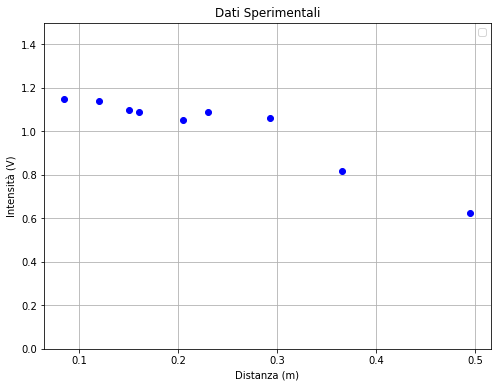

In [ ]:
plt.figure(figsize=[8,6])
plotSizeX=40                                     # Dimensione in X del grafico
plotSizeY= 400
dati=np.loadtxt("DueLenti.txt", dtype=np.str, delimiter="\t", skiprows=1) #scarto l'header del file
dati = dati.astype(np.float)
dist=dati[:,0] 
intens=dati[:,1] 

distanza = [i / 100 for i in dist] #conversione unità di msiura
intensità = [i / 1000 for i in intens] #conversione unità di msiura

print("\n Distanza (m)\t\tIntensità (V)")
for i in range(len(distanza)):
  print(distanza[i],"\t",intensità[i])


plt.scatter(distanza, intensità, color='blue')

plt.title("Dati Sperimentali")
plt.grid(True)
plt.xlabel("Distanza (m)")
plt.ylabel("Intensità (V)")
plt.ylim(0,1.5)
plt.legend()

Dovremmo ottenere un'intensità costante al variare della distanza, in quanto abbiamo collimato il fascio di luce proveniente dal led e poi rifocalizzato sul fotodiodo. Ciò avviene fino a circa 30 centimetri, ma poi osserviamo un picco. Il risultato è giustificabile dal nostro apparato strumentale: infatti


*   Un led **non è** una sorgente di luce puntiforme;
*   Il processo di collimazione e rifocalizzazione, ottenuta ottimizzando le distanze led-lente e lente-fotodiodo attraverso l'uso di uno oscilloscopio e "a occhio", non è di facile realizzazione d è pertanto soggetta ad un errore sistematico non trascurabile.

